In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# DOWNLOAD DATASET AND BASIC REQUIREMNETS



# Importing header files and loading dataset 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns',None)

In [ ]:
train_df = pd.read_csv("/kaggle/input/DontGetKicked/training.csv")
test_df = pd.read_csv("/kaggle/input/DontGetKicked/test.csv")
submissions_df = pd.read_csv("/kaggle/input/DontGetKicked/example_entry.csv")

train_df.head(5)

#EXPLORATORY DATA ANALYSIS

In [ ]:
a=train_df.IsBadBuy.value_counts()
plt.figure(figsize=(3,3.5))
sns.barplot(x=['Yes','No'],y=a,palette=['g','r'])
plt.ylabel('counts')
plt.title("Is Bad Buy")
plt.show()

In [ ]:
age=pd.DataFrame(train_df.VehicleAge.value_counts())
plt.figure(figsize=(6,4))
sns.barplot(x=age.index,y='VehicleAge',data=age,palette='Set2')
plt.ylabel('counts')
plt.xlabel('Age of Vehicle')
plt.title("Vehicle Age")
plt.show()

In [ ]:
plt.title("Vehicle Age vs Is Bad Buy ")
sns.countplot(x = "VehicleAge", data =train_df, hue = "IsBadBuy",palette=['y','c'])
plt.legend(['0:Good buy','1:BadBuy'])
plt.show()

In [ ]:
px.histogram(train_df, x = "Make", color = "IsBadBuy",height=500,width=800)

In [ ]:
px.histogram(train_df, x = "Nationality", color = "IsBadBuy",height=450,width=800)

In [ ]:
px.histogram(train_df, x = "Auction", color = "IsBadBuy",height=450,width=800)

In [ ]:
px.scatter(train_df.head(5000), x = 'MMRAcquisitionAuctionAveragePrice', y = 'MMRAcquisitionRetailAveragePrice', color = 'IsBadBuy',height=500,width=1000)

In [ ]:
px.scatter(train_df, x = 'MMRAcquisitionAuctionAveragePrice', y = 'MMRCurrentAuctionAveragePrice' ,color = 'IsBadBuy',height=500,width=1000)

In [ ]:
px.scatter(train_df, x = 'MMRAcquisitionAuctionAveragePrice', y = 'MMRAcquisitionRetailAveragePrice', color = 'IsBadBuy',height=500,width=1000)

In [ ]:
plt.figure(figsize=(25,10))
mask_matrix=np.triu(train_df.corr())
sns.heatmap(train_df.corr(),cmap='crest',annot=True, linewidths=.5, fmt= '.1f',mask=mask_matrix);
plt.show();

In [ ]:
total=train_df.Nationality.value_counts()
american=train_df[(train_df.Nationality=='AMERICAN')&(train_df.IsBadBuy==1)].count()[1]
otherasian=train_df[(train_df.Nationality=='OTHER ASIAN')&(train_df.IsBadBuy==1)].count()[1]
topasian=train_df[(train_df.Nationality=='TOP LINE ASIAN')&(train_df.IsBadBuy==1)].count()[1]
other=train_df[(train_df.Nationality=='OTHER')&(train_df.IsBadBuy==1)].count()[1]
print("Probability of bad buys depending on country :- \n----------------------------------------------\n")
print("AMERICAN\t: ",american/total[0],
        "\nOTHER ASIAN\t: ",otherasian/total[1], 
        "\nTop LINE ASIAN\t: " ,topasian/total[2],
        "\nOTHERS\t\t: ",other/total[3])
x_titles=['American','OtherAsian','TopLineAsian','Others'];
y_titles=[american/total[0],otherasian/total[1],topasian/total[2],other/total[3]]
plt.figure(figsize=(8,6))
plt.title("Probability of bad buys depending on country",fontsize=16)
plt.ylabel('Probability',fontsize=16)
plt.xlabel('Country',fontsize=16)
sns.barplot(x=x_titles,y=y_titles);
plt.show()

### Analysis made:

* The given Dataset has Dataset alot of Yes for **`IsBadBuy`** column (alot of zeros denoting good buy)
* Maximum cars comming for resale is **3-4 yrs** old and is mostly considered a good buy compared to the ones which are **4-5 years** old
* **Top LINE ASIAN** countries seem to dominate the probability of bad buys when segregated according to nationality
* Resale Cars from **America** can be bought as it has less chances of beeing a bad buy as compared to the other nationalities 
* **Ford** and **Chevrolet** cars have a high chance of being a bad buy

#Feature Engineering

In [ ]:
print("Description about the columns of Dataset:-\n")
text_file = open('/kaggle/input/DontGetKicked/Carvana_Data_Dictionary.txt')
file_content = text_file.read()
print(file_content)
text_file.close()

1. **`RefId`** is not a useful column .
2. **`BYRNO`**(Unique number assigned to the buyer that purchased the vehicle) is not useful too
3. **`VNZIP1`** (Zipcode where the car was purchased) is not useful too
4. The vehicle age and VehYear bought are present thus **`PurchDate`** is not required.


In [ ]:
train_df.drop(['RefId','BYRNO','VNZIP1','PurchDate'],axis=1,inplace=True)
test_df.drop(['RefId','BYRNO','VNZIP1','PurchDate'],axis=1,inplace=True)

In [ ]:
print("For Training Dataset:")
df=pd.DataFrame(train_df.isna().sum())
df.rename({0:'counts'},axis=1,inplace=True)
df[(df.counts>0)]

In [ ]:
print("For Test Dataset:")
df=pd.DataFrame(test_df.isna().sum())
df.rename({0:'counts'},axis=1,inplace=True)
df[(df.counts>0)]

In [ ]:
#for col in train_df:
#    print(col," value_counts",len(train_df[f'{col}'].value_counts()))

In [ ]:
print("Model.value_counts:",len(train_df.Model.value_counts(dropna=False)))
print("Make.value_counts:",len(train_df.Make.value_counts(dropna=False)))
print("SubModel.value_counts:",len(train_df.SubModel.value_counts(dropna=False)))
print("Color.value_counts:",len(train_df.Color.value_counts(dropna=False)))
print("WheelType.value_counts:",len(train_df.WheelType.value_counts(dropna=False)))
print("WheelTypeID.value_counts:",len(train_df.WheelTypeID.value_counts(dropna=False)))
print("Trim.value_counts:",len(train_df.Trim.value_counts(dropna=False)))
print("TopThreeAmericanName.value_counts:",len(train_df.TopThreeAmericanName.value_counts(dropna=False)))
print("Nationality.value_counts:",len(train_df.Nationality.value_counts(dropna=False)))
print("Transmission.value_counts:",len(train_df.Transmission.value_counts(dropna=False)))
print("Size.value_counts:",len(train_df.Size.value_counts(dropna=False)))
print("AUCGUART.value_counts:",len(train_df.AUCGUART.value_counts(dropna=False)))
print("PRIMEUNIT.value_counts:",len(train_df.AUCGUART.value_counts(dropna=False)))
print("VNST.value_counts:",len(train_df.VNST.value_counts(dropna=False)))
print("IsOnlineSale.value_counts:",len(train_df.IsOnlineSale.value_counts(dropna=False)))

In [ ]:
train_df.Transmission.value_counts(dropna=False)
train_df["Transmission"].replace("Manual","MANUAL",inplace=True)
train_df.Transmission.value_counts(dropna=False)

In [ ]:
train_df.WheelType.value_counts(dropna=False)

In [ ]:
train_df.WheelTypeID.value_counts(dropna=False)

Notice **`WheelType`** and **`WheelTypeId`** are the same columns one in coded values other in text

In [ ]:
train_df.Nationality.value_counts(dropna=False)

In [ ]:
train_df.Size.value_counts(dropna=False)

In [ ]:
train_df.Model.value_counts(dropna=False)

### Conclusions


1. We can drop **`Model`**, **`Trim`** and **`SubModel`** as they have alot of categories and model wont be able to learn all of them.


2. Note: **`WheelType`** and **`WheelTypeID`** are one and the same. One of them is containing numeric categories and other as string. Its better we drop **`WheelTypeID`** as the other column has type of metal used for making the wheel which might help us understand the importance of a particular metal used in making the wheel

3.  **`VehYear`** might not play a crucial role as we have  **`VehicleAge`** as a column. The  **`PurchDate`** varies and similarly  **`VehYear`** varies.The only thing that matters is how much old the vehicle is at the time of resale. Thus `drop` **`VehYear`**

4. State from which car is bought should nit be a factor for judging bad buy . Thus we can drop **`VNST`** .


In [ ]:
train_df.drop(['Model','Trim','SubModel','VehYear','WheelTypeID','VNST'],axis=1,inplace=True)
test_df.drop(['Model','Trim','SubModel','VehYear','WheelTypeID','VNST'],axis=1,inplace=True)

In [ ]:
train_df.sample(5)

In [ ]:
targets=train_df['IsBadBuy']
train_df.drop('IsBadBuy',axis=1,inplace=True)

# Data Cleaning


In [ ]:
categorical_cols = train_df.select_dtypes(include = 'object').columns.tolist()
numeric_cols = train_df.select_dtypes(exclude='object').columns.tolist()

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean');
imputer.fit(train_df[numeric_cols]);
train_df[numeric_cols]=imputer.transform(train_df[numeric_cols]);
test_df[numeric_cols]=imputer.transform(test_df[numeric_cols]);

In [ ]:
df=pd.DataFrame(train_df.isna().sum())
df.rename({0:'counts'},axis=1,inplace=True)
df[(df.counts>0)]

In [ ]:
# Due to different versions of libraries OneHotEncoder is not working efficiently (i.e not able to deal with NaN values)
train_df.Transmission.fillna('Trans_unk',inplace=True)
train_df.WheelType.fillna('WheelType_unk',inplace=True)
train_df.Nationality.fillna('Nationality_unk',inplace=True)
train_df.Size.fillna('Trans_unk',inplace=True)
train_df.TopThreeAmericanName.fillna('TopThreeAmericanName_unk',inplace=True)
train_df.PRIMEUNIT.fillna('PRIMEUNIT_unk',inplace=True)
train_df.AUCGUART.fillna('AUCGUART_unk',inplace=True)
train_df.Color.fillna('Color_unk',inplace=True)

test_df.TopThreeAmericanName.fillna('Trans_unk',inplace=True)
test_df.Size.fillna('Trans_unk',inplace=True)
test_df.WheelType.fillna('Trans_unk',inplace=True)
test_df.Nationality.fillna('Trans_unk',inplace=True)
test_df.Transmission.fillna('Trans_unk',inplace=True)
test_df.PRIMEUNIT.fillna('PRIMEUNIT_unk',inplace=True)
test_df.AUCGUART.fillna('AUCGUART_unk',inplace=True)
test_df.Color.fillna('Color_unk',inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')
encoder.fit(train_df[categorical_cols])
encoded_cols=list(encoder.get_feature_names(categorical_cols))
train_df[encoded_cols]=encoder.transform(train_df[categorical_cols]);
test_df[encoded_cols]=encoder.transform(test_df[categorical_cols]);

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_df[numeric_cols]);
train_df[numeric_cols]=scaler.transform(train_df[numeric_cols])
test_df[numeric_cols]=scaler.transform(test_df[numeric_cols])

In [ ]:
train_df=train_df[numeric_cols+encoded_cols]
test_df=test_df[numeric_cols+encoded_cols]

In [ ]:
from sklearn.model_selection import train_test_split
inputs,val_inputs,targets,val_targets = train_test_split(train_df,targets,test_size=0.25, random_state=42)

# DUMB MODEL

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
# A Dum model saying "NO" always has a accuracy of 87% . So we need to have a percentage above it !!!!!!!!
dum_model_outs=np.zeros(len(inputs))
accuracy_score(dum_model_outs,targets)

# Model-1 : DecisionTreeClassifier

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
model=DecisionTreeClassifier(max_depth=12,random_state=42)
model.fit(inputs,targets)
print("Train_acc:",model.score(inputs,targets)," | Val_acc:",model.score(val_inputs,val_targets))

In [ ]:
def max_depth(min,max):
    depth=[]
    tr_ac=[]
    va_ac=[]
    for i in range(min,max,2):
        model =DecisionTreeClassifier(max_depth=i, random_state=42)
        model.fit(inputs,targets)
        depth.append(i)
        tr_ac.append(model.score(inputs,targets))
        va_ac.append(model.score(val_inputs,val_targets))
        
    tr_ac=1-np.array(tr_ac);
    va_ac=1-np.array(va_ac);
    
    plt.figure(figsize=(10,8))
    sns.set_style('darkgrid')
    plt.title('Error in train and Validation Accuracy Vs Depth')
    plt.xlabel('Depth')
    plt.ylabel('Error in Accuracy')
    plt.plot(depth,tr_ac,'cs-',linewidth=3,markersize=9)
    plt.plot(depth,va_ac,'D--',color='orange',linewidth=3, markersize=7)
    plt.legend(['Loss_Train','Loss_Val']);
    plt.show()
max_depth(4,18)

In [ ]:
model=DecisionTreeClassifier(max_depth=6,random_state=42,max_features=0.9,class_weight={0:1,1:2})
model.fit(inputs,targets)
print("Train_acc:",model.score(inputs,targets)," | Val_acc:",model.score(val_inputs,val_targets))

In [ ]:
preds=model.predict(test_df)
submissions_df['IsBadBuy']=preds
submissions_df.to_csv('Submissions.csv',index=False)

#Model-2 :- Random Forest Classifier



In [ ]:
from sklearn.ensemble import RandomForestClassifier    

In [ ]:
%%time
model=RandomForestClassifier(n_jobs=-1,n_estimators=12,max_depth=16,random_state=42)
model.fit(inputs,targets)
print("Train_acc:",model.score(inputs,targets)," | Val_acc:",model.score(val_inputs,val_targets))

In [ ]:
def max_depth(min,max):
    depth=[]
    tr_ac=[]
    va_ac=[]
    for i in range(min,max,2):
        model =RandomForestClassifier(max_depth=i, random_state=42)
        model.fit(inputs,targets)
        depth.append(i)
        tr_ac.append(model.score(inputs,targets))
        va_ac.append(model.score(val_inputs,val_targets))
        
    tr_ac=1-np.array(tr_ac);
    va_ac=1-np.array(va_ac);
    
    plt.figure(figsize=(10,8))
    sns.set_style('darkgrid')
    plt.title('Error in train and Validation Accuracy Vs Depth')
    plt.xlabel('Depth')
    plt.ylabel('Error in Accuracy')
    plt.plot(depth,tr_ac,'cs-',linewidth=3,markersize=9)
    plt.plot(depth,va_ac,'D--',color='orange',linewidth=3, markersize=7)
    plt.legend(['Loss_Train','Loss_Val']);
    plt.show()
max_depth(10,20)

In [ ]:
def test_model(**params):
        model=RandomForestClassifier(n_jobs=-1,random_state=42,**params)
        model.fit(inputs,targets)
        print(" | Train_acc: ",model.score(inputs,targets)," | Val_acc: ",model.score(val_inputs,val_targets) ) 
        return model.score(inputs,targets),model.score(val_inputs,val_targets)

In [ ]:
test_model(n_estimators=12)
test_model(n_estimators=100)

In [ ]:
%%time
model=RandomForestClassifier(n_jobs=-1,n_estimators=100,max_depth=16,random_state=42)
model.fit(inputs,targets)
print("Train_acc:",model.score(inputs,targets)," | Val_acc:",model.score(val_inputs,val_targets))

In [ ]:
importance_df = pd.DataFrame({
    'feature': inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10),palette='husl',x='importance', y='feature');
plt.show()

In [ ]:
preds=model.predict_proba(test_df)
submissions_df['IsBadBuy']=preds[:,1]
submissions_df.to_csv('Submissions.csv',index=False)

## Summary

* did **exploratory data analysis** , **data cleaning** and created **2 models** to predict outputs 
* Train_acc=91.26 %
* Test_acc=**90.05** %
* Submission in Kaggle lies in in top 100(i.e **top 20%****)

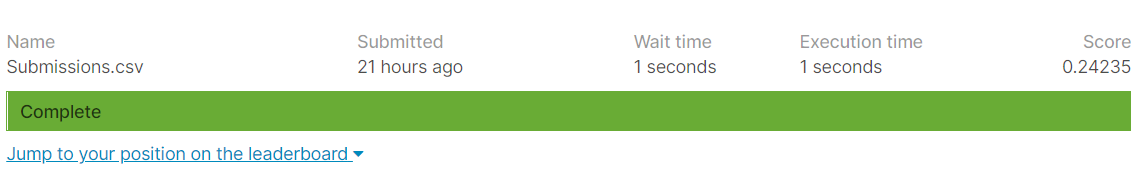

# Conclusion
I took my inspriation from the following notebooks:-

* https://www.kaggle.com/mikhailtokar/ml-rgr-dgk
* https://www.kaggle.com/yogesh893/dont-get-kicked
* https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/random-forests-and-regularization
* https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/gradient-boosting-with-xgboost